**SOLAR WIND DATA ANALYSIS**

**PROBLEM STATEMENT:**
Solar wind can disrupt satellites and power grids and Current methods for predicting solar wind conditions are insufficiently reliable.The goal of this project is to analyze and predict solar wind parameters using various machine learning models

In [3]:
import pandas as pd

# Path to your CSV file
file_path = 'year.csv'

# Read the CSV file, skipping the first 13 lines
df = pd.read_csv(file_path, skiprows=13)


In [4]:
df.head()

,Unnamed: 0,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,02-01-2020,00:00:00,0,3.21,1.34,5.65,0.97,-2.96,3.32,-1.58,...,60.99,2.78,0.83,6.05,340.66,301.67,382.93,36386,16024,76056
1,03-01-2020,00:00:00,0,5.70,1.60,9.64,0.01,-6.78,4.49,-2.47,...,77.00,3.78,0.90,9.07,358.44,322.47,412.20,65134,18686,170161
2,04-01-2020,00:00:00,0,4.72,1.70,9.16,0.27,-2.92,3.35,-4.46,...,60.41,0.69,0.10,4.62,388.49,329.61,416.11,51176,11979,152506
3,05-01-2020,00:00:00,0,8.98,3.14,13.62,2.44,-5.06,7.48,-5.32,...,67.84,2.52,0.18,16.43,383.05,317.21,545.99,86951,11293,320835
4,06-01-2020,00:00:00,0,3.79,2.12,5.26,1.15,-4.93,4.92,-0.96,...,78.97,1.10,0.14,2.38,489.30,450.20,553.63,102570,44959,256890


**DATA PREPROCESSING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1635 non-null   object 
 1   Timestamp   1635 non-null   object 
 2   Source      1635 non-null   int64  
 3   Bt-med      1635 non-null   float64
 4   Bt-min      1635 non-null   float64
 5   Bt-max      1635 non-null   float64
 6   Bx-med      1635 non-null   float64
 7   Bx-min      1635 non-null   float64
 8   Bx-max      1635 non-null   float64
 9   By-med      1635 non-null   float64
 10  By-min      1635 non-null   float64
 11  By-max      1635 non-null   float64
 12  Bz-med      1635 non-null   float64
 13  Bz-min      1635 non-null   float64
 14  Bz-max      1635 non-null   float64
 15  Phi-mean    1635 non-null   float64
 16  Phi-min     1635 non-null   float64
 17  Phi-max     1635 non-null   float64
 18  Theta-med   1635 non-null   float64
 19  Theta-min   1635 non-null  

In [6]:
df.describe()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1.635000e+03
mean,0.944343,-13695.415498,-13697.515670,-13692.887456,-13700.204128,-13704.110887,-13696.204263,-13700.303835,-13704.866532,-13695.675939,...,-13648.536135,-25866.375651,-25869.001125,-25860.779199,-25564.883798,-25596.061700,-25526.074526,69241.146789,9799.400612,2.214239e+05
std,0.935475,34397.128554,34396.291472,34398.136320,34395.220028,34393.662941,34396.814201,34395.180299,34393.361869,34397.024883,...,34415.816090,43808.774237,43807.222654,43812.082077,43986.996672,43968.558074,44009.949813,147723.794896,83893.670322,3.450662e+05
min,-1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04
25%,1.000000,3.475000,1.415000,4.895000,-3.325000,-7.205000,2.075000,-3.260000,-8.630000,1.870000,...,40.275000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04
50%,1.000000,4.580000,2.550000,6.670000,-0.750000,-4.640000,3.870000,-1.200000,-5.300000,4.080000,...,58.070000,4.870000,1.730000,9.500000,362.600000,323.500000,411.800000,51957.000000,14089.000000,1.525060e+05
75%,2.000000,6.105000,3.760000,9.345000,2.015000,-3.200000,5.505000,1.780000,-3.570000,6.130000,...,71.505000,7.755000,3.805000,14.385000,442.900000,395.460000,508.000000,130444.500000,42823.000000,3.652370e+05
max,2.000000,27.090000,15.700000,72.650000,7.010000,3.430000,21.600000,15.030000,2.480000,72.150000,...,88.410000,27.130000,11.080000,76.300000,667.900000,582.980000,851.060000,865361.000000,484596.000000,4.965233e+06


In [7]:
null_values = df.isnull().sum()
print(null_values)

Unnamed: 0    0
Timestamp     0
Source        0
Bt-med        0
Bt-min        0
Bt-max        0
Bx-med        0
Bx-min        0
Bx-max        0
By-med        0
By-min        0
By-max        0
Bz-med        0
Bz-min        0
Bz-max        0
Phi-mean      0
Phi-min       0
Phi-max       0
Theta-med     0
Theta-min     0
Theta-max     0
Dens-med      0
Dens-min      0
Dens-max      0
Speed-med     0
Speed-min     0
Speed-max     0
Temp-med      0
Temp-min      0
Temp-max      0
dtype: int64


In [8]:
df.duplicated().sum()

0

In [9]:
magnetic_field = df[['Bt-med', 'Bt-min', 'Bt-max']].describe()
magnetic_field


,Bt-med,Bt-min,Bt-max
count,1635.000000,1635.000000,1635.000000
mean,-13695.415498,-13697.515670,-13692.887456
std,34397.128554,34396.291472,34398.136320
min,-99999.000000,-99999.000000,-99999.000000
25%,3.475000,1.415000,4.895000
50%,4.580000,2.550000,6.670000
75%,6.105000,3.760000,9.345000
max,27.090000,15.700000,72.650000


Inference: The magnetic field strength data contains extreme outliers (e.g., -99999), which likely indicate missing or erroneous data.

In [10]:
dens= df[['Dens-med', 'Dens-min', 'Dens-max']].describe()
dens

,Dens-med,Dens-min,Dens-max
count,1635.000000,1635.000000,1635.000000
mean,-25866.375651,-25869.001125,-25860.779199
std,43808.774237,43807.222654,43812.082077
min,-99999.000000,-99999.000000,-99999.000000
25%,-99999.000000,-99999.000000,-99999.000000
50%,4.870000,1.730000,9.500000
75%,7.755000,3.805000,14.385000
max,27.130000,11.080000,76.300000


Inference: Similar to the magnetic field data, the density measurements contain extreme outliers indicating missing or erroneous data. 

In [11]:
speed = df[['Speed-med', 'Speed-min', 'Speed-max']].describe()

speed

,Speed-med,Speed-min,Speed-max
count,1635.000000,1635.000000,1635.000000
mean,-25564.883798,-25596.061700,-25526.074526
std,43986.996672,43968.558074,44009.949813
min,-99999.000000,-99999.000000,-99999.000000
25%,-99999.000000,-99999.000000,-99999.000000
50%,362.600000,323.500000,411.800000
75%,442.900000,395.460000,508.000000
max,667.900000,582.980000,851.060000


The particle speed data also contains extreme outliers. 

In [12]:
temp = df[['Temp-med', 'Temp-min', 'Temp-max']].describe()
temp

,Temp-med,Temp-min,Temp-max
count,1635.000000,1635.000000,1.635000e+03
mean,69241.146789,9799.400612,2.214239e+05
std,147723.794896,83893.670322,3.450662e+05
min,-99999.000000,-99999.000000,-9.999900e+04
25%,-99999.000000,-99999.000000,-9.999900e+04
50%,51957.000000,14089.000000,1.525060e+05
75%,130444.500000,42823.000000,3.652370e+05
max,865361.000000,484596.000000,4.965233e+06


The temperature data has significant outliers.

In [13]:
# Filter out extreme outliers
filtered_df = df[(df['Bt-med'] > -99999) & (df['Dens-med'] > -99999) & 
                 (df['Speed-med'] > -99999) & (df['Temp-med'] > -99999)]


In [16]:
#STATISTICAL ANALYSIS

In [15]:
magnetic_filtered = filtered_df[['Bt-med', 'Bt-min', 'Bt-max']].describe()
magnetic_filtered


,Bt-med,Bt-min,Bt-max
count,1211.000000,1211.000000,1211.000000
mean,5.393666,3.023014,8.231577
std,2.250708,1.590396,3.859405
min,1.540000,0.240000,3.070000
25%,3.890000,1.890000,5.600000
50%,4.900000,2.810000,7.160000
75%,6.270000,3.885000,9.645000
max,27.090000,13.740000,33.540000


When excluding extreme outliers, the median suggest that typical Bt values lie between 1.54 and 27.09 nT.

In [17]:
dens_filtered= filtered_df[['Dens-med', 'Dens-min', 'Dens-max']].describe()
dens_filtered

,Dens-med,Dens-min,Dens-max
count,1211.000000,1211.000000,1211.000000
mean,6.646276,3.102626,14.201371
std,3.355300,2.185553,9.125735
min,0.140000,0.100000,1.870000
25%,4.255000,1.310000,8.400000
50%,6.350000,2.810000,11.790000
75%,8.625000,4.470000,16.585000
max,27.130000,11.080000,76.300000


The typical particle density(med) ranges from 0.14 to 27.13 particles per cm³ when excluding extreme outliers .

In [18]:
speed_filtered = filtered_df[['Speed-med', 'Speed-min', 'Speed-max']].describe()

speed_filtered

,Speed-med,Speed-min,Speed-max
count,1211.000000,1211.000000,1211.000000
mean,413.388101,371.325780,465.754707
std,81.204656,70.228485,93.942035
min,270.800000,244.700000,288.900000
25%,345.750000,314.330000,389.800000
50%,401.460000,357.550000,464.050000
75%,474.300000,418.300000,533.300000
max,667.900000,582.980000,851.060000


 The speed(median) shows that typical particle speeds range from 270.8 to 667.9 km/s.

In [19]:
temp_filtered = filtered_df[['Temp-med', 'Temp-min', 'Temp-max']].describe()
temp_filtered

,Temp-med,Temp-min,Temp-max
count,1211.000000,1211.000000,1.211000e+03
mean,128351.649876,48124.672172,3.337731e+05
std,126329.879015,61797.800141,3.347207e+05
min,8664.000000,5000.000000,1.657100e+04
25%,38217.000000,11648.000000,1.201070e+05
50%,84533.000000,22678.000000,2.417940e+05
75%,178077.500000,59069.000000,4.351995e+05
max,865361.000000,484596.000000,4.965233e+06


The temperature(median)shows that typical temperatures range from approximately 8664 K to 8,65,361 K.

**VISUAL ANALYSIS**

**HISTOGRAM**

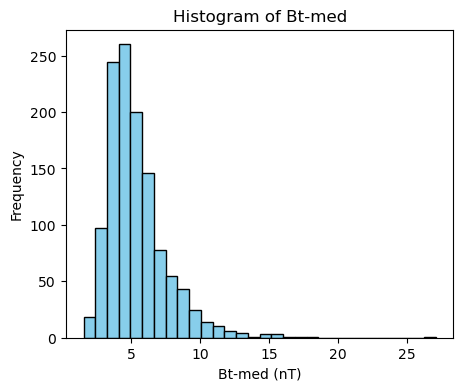

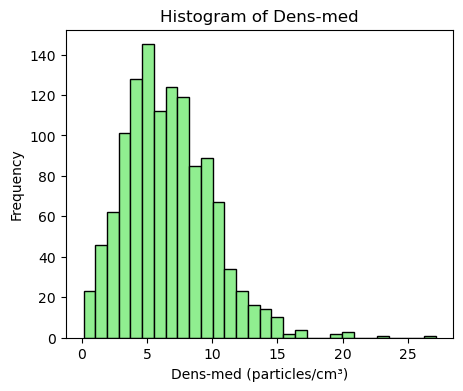

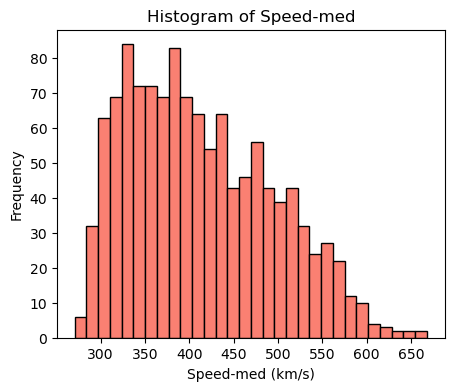

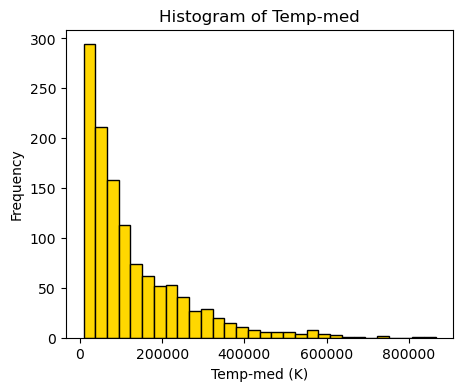

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.hist(filtered_df['Bt-med'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Bt-med')
plt.xlabel('Bt-med (nT)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(filtered_df['Dens-med'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Dens-med')
plt.xlabel('Dens-med (particles/cm³)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(filtered_df['Speed-med'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Speed-med')
plt.xlabel('Speed-med (km/s)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(filtered_df['Temp-med'], bins=30, color='gold', edgecolor='black')
plt.title('Histogram of Temp-med')
plt.xlabel('Temp-med (K)')
plt.ylabel('Frequency')
plt.show()


Histogram of Bt-med:The histogram shows that the median magnetic field strength (Bt-med) is predominantly clustered between 3 nT and 10 nT, with a few higher values reaching up to 27 nT.


Histogram of Density-med:The particle density (Dens-med) is mostly concentrated between 0 and 20 particles/cm³, with a significant number of observations below 10 particles/cm³.




Histogram of speed-med:The median particle speed (Speed-med) shows a concentration around 300 to 500 km/s, indicating that most measurements fall within this range.


Histogram of temperature-med:The particle temperature (Temp-med) is widely spread with a notable concentration below 100,000 K, though there are higher values that extend beyond this range.

**BOX PLOT**

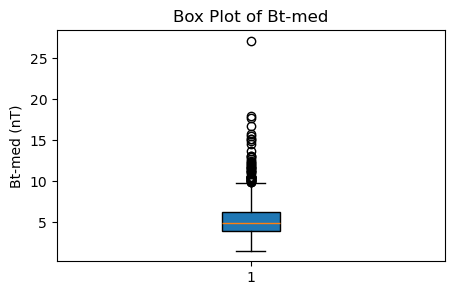

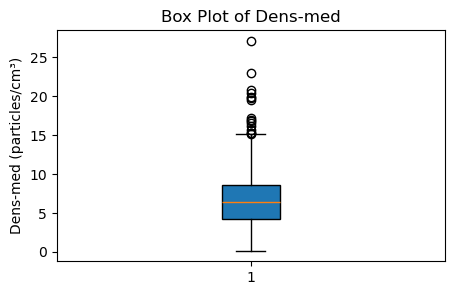

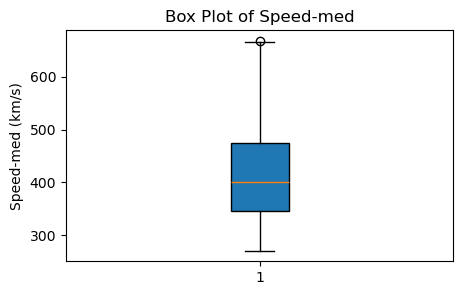

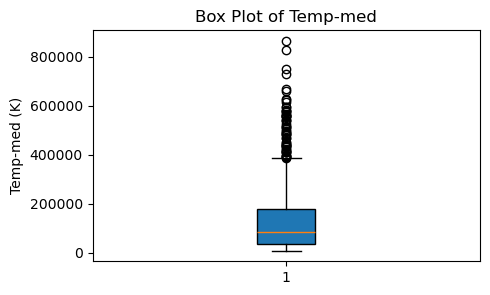

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.boxplot(filtered_df['Bt-med'], patch_artist=True)
plt.title('Box Plot of Bt-med')
plt.ylabel('Bt-med (nT)')
plt.show()

plt.figure(figsize=(5, 3))
plt.boxplot(filtered_df['Dens-med'], patch_artist=True)
plt.title('Box Plot of Dens-med')
plt.ylabel('Dens-med (particles/cm³)')
plt.show()

plt.figure(figsize=(5, 3))
plt.boxplot(filtered_df['Speed-med'], patch_artist=True)
plt.title('Box Plot of Speed-med')
plt.ylabel('Speed-med (km/s)')
plt.show()

plt.figure(figsize=(5, 3))
plt.boxplot(filtered_df['Temp-med'], patch_artist=True)
plt.title('Box Plot of Temp-med')
plt.ylabel('Temp-med (K)')
plt.show()


Box Plot of Bt-med:
The box plot highlights the central tendency and spread of Bt-med, showing that most values lie between 3.5 nT and 9.5 nT, with a few outliers above this range.

Box Plot of Dens-med:
The box plot for Dens-med shows that the majority of values are below 10 particles/cm³, with a few outliers extending beyond this range.

Box Plot of Speed-med:
The box plot indicates that most particle speeds are between 300 and 500 km/s, with some higher speed outliers.

Box Plot of Temp-med:
The temperature data has a wide range, with most values between 0 and 2,00,000 K, but includes some extreme outliers reaching up to approximately 8 million K.

**HEAT MAP**

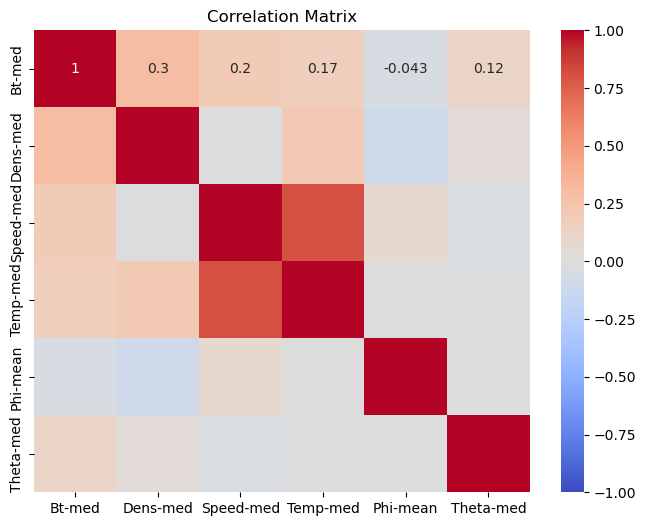

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your CSV file
file_path = 'year.csv'

# Read the CSV file, skipping the first 13 lines
df = pd.read_csv(file_path, skiprows=13)
# Filter out extreme outliers
filtered_df = df[(df['Bt-med'] > -99999) & (df['Dens-med'] > -99999) & 
                 (df['Speed-med'] > -99999) & (df['Temp-med'] > -99999)&
                (df['Phi-mean'] > -99999) & (df['Theta-med'] > -99999)]


# Correlation matrix
corr_matrix = filtered_df[['Bt-med', 'Dens-med', 'Speed-med', 'Temp-med','Phi-mean','Theta-med']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Strong Positive Correlations:

Speed-med and Temp-med: (0.81)

Moderate Positive Correlations:

Bt-med and Speed-med: (0.2) ,
Bt-med and Temp-med: (0.17) ,
Temp-med and Dens-med: (0.22) ,
Bt-med and Theta-med: (0.12),
Bt-med and Dens-med: (0.3)

**SCATTER PLOT**

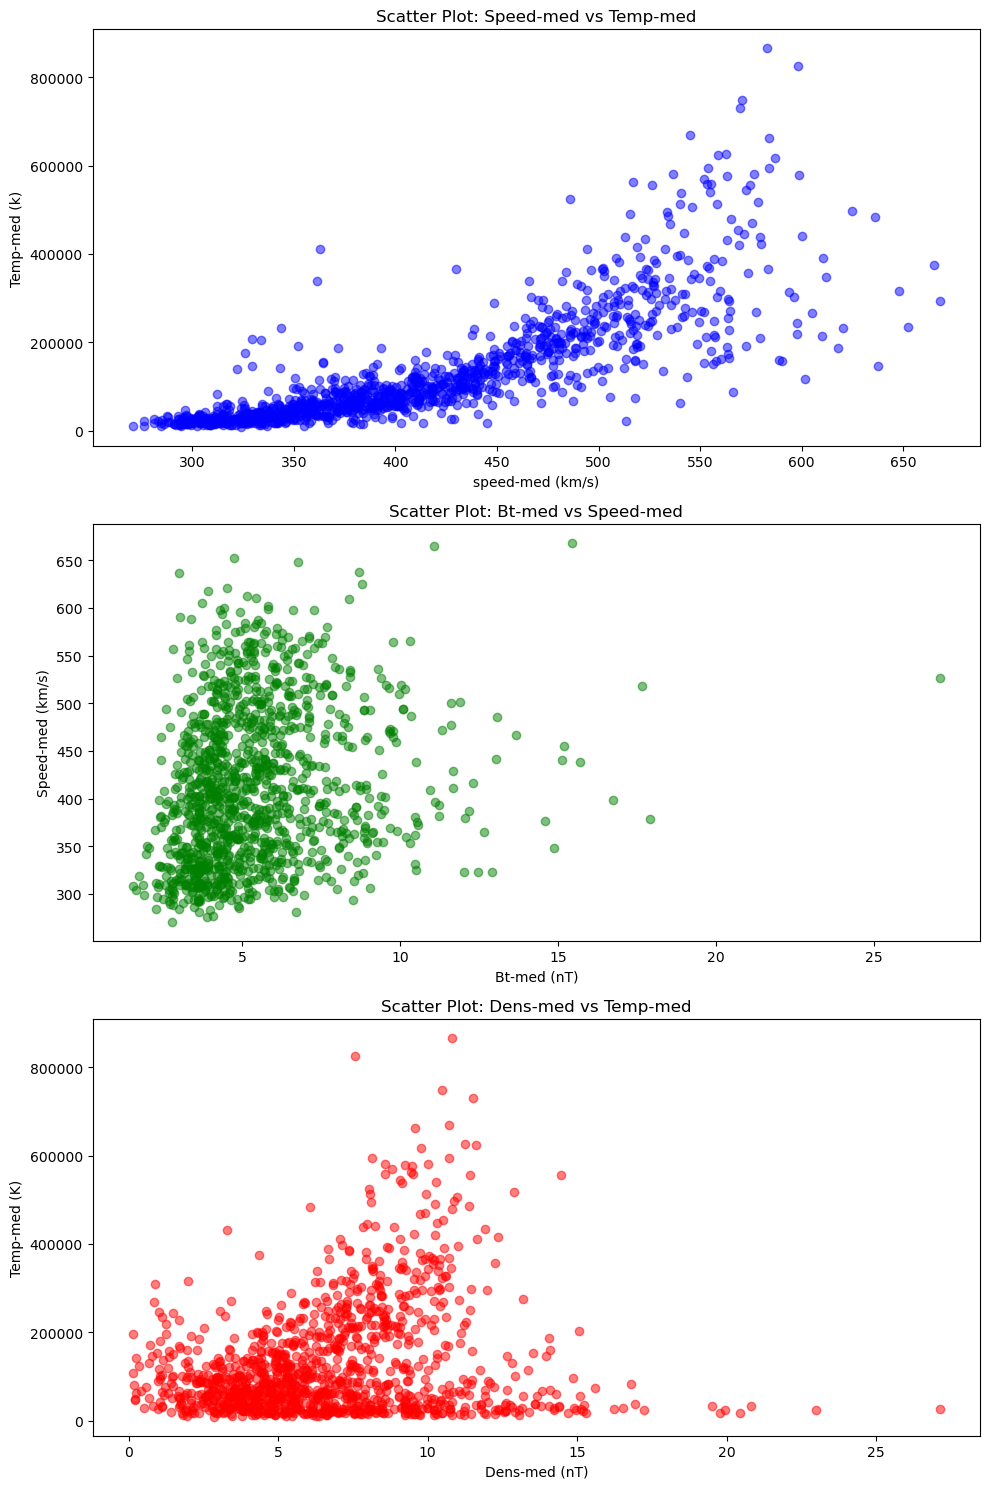

In [23]:
import pandas as pd

# Path to your CSV file
file_path = 'year.csv'

# Read the CSV file, skipping the first 13 lines
df = pd.read_csv(file_path, skiprows=13)
# Filter out extreme outliers
filtered_df = df[(df['Bt-med'] > -99999) & (df['Dens-med'] > -99999) & 
                 (df['Speed-med'] > -99999) & (df['Temp-med'] > -99999)]
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].scatter(filtered_df['Speed-med'], filtered_df['Temp-med'], color='blue', alpha=0.5)
axes[0].set_title('Scatter Plot: Speed-med vs Temp-med')
axes[0].set_xlabel('speed-med (km/s)')
axes[0].set_ylabel('Temp-med (k)')

axes[1].scatter(filtered_df['Bt-med'], filtered_df['Speed-med'], color='green', alpha=0.5)
axes[1].set_title('Scatter Plot: Bt-med vs Speed-med')
axes[1].set_xlabel('Bt-med (nT)')
axes[1].set_ylabel('Speed-med (km/s)')

axes[2].scatter(filtered_df['Dens-med'], filtered_df['Temp-med'], color='red', alpha=0.5)
axes[2].set_title('Scatter Plot: Dens-med vs Temp-med')
axes[2].set_xlabel('Dens-med (nT)')
axes[2].set_ylabel('Temp-med (K)')

plt.tight_layout()
plt.show()

**MACHINE LEARNING**

In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

%matplotlib inline

In [26]:
wind= pd.read_csv('year.csv', skiprows=13)
wind_df = wind[(wind['Bt-med'] > -99999) & (wind['Bt-min'] > -99999) & 
                     (wind['Bt-max'] > -99999) & (wind['Bx-med'] > -99999) & 
                     (wind['Bx-min'] > -99999) & (wind['Bx-max'] > -99999) & 
                     (wind['By-med'] > -99999) & (wind['By-min'] > -99999) & 
                     (wind['By-max'] > -99999) & (wind['Bz-med'] > -99999) & 
                     (wind['Bz-min'] > -99999) & (wind['Bz-max'] > -99999) & 
                     (wind['Phi-mean'] > -99999) & (wind['Phi-min'] > -99999) & 
                     (wind['Phi-max'] > -99999) & (wind['Theta-med'] > -99999) & 
                     (wind['Theta-min'] > -99999) & (wind['Theta-max'] > -99999) & 
                     (wind['Dens-med'] > -99999) & (wind['Dens-min'] > -99999) & 
                     (wind['Dens-max'] > -99999) & (wind['Speed-med'] > -99999) & 
                     (wind['Speed-min'] > -99999) & (wind['Speed-max'] > -99999) & 
                     (wind['Temp-med'] > -99999) & (wind['Temp-min'] > -99999) & 
                     (wind['Temp-max'] > -99999)]
wind_df 


,Unnamed: 0,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,02-01-2020,00:00:00,0,3.21,1.34,5.65,0.97,-2.96,3.32,-1.58,...,60.99,2.78,0.83,6.05,340.66,301.67,382.93,36386,16024,76056
1,03-01-2020,00:00:00,0,5.70,1.60,9.64,0.01,-6.78,4.49,-2.47,...,77.00,3.78,0.90,9.07,358.44,322.47,412.20,65134,18686,170161
2,04-01-2020,00:00:00,0,4.72,1.70,9.16,0.27,-2.92,3.35,-4.46,...,60.41,0.69,0.10,4.62,388.49,329.61,416.11,51176,11979,152506
3,05-01-2020,00:00:00,0,8.98,3.14,13.62,2.44,-5.06,7.48,-5.32,...,67.84,2.52,0.18,16.43,383.05,317.21,545.99,86951,11293,320835
4,06-01-2020,00:00:00,0,3.79,2.12,5.26,1.15,-4.93,4.92,-0.96,...,78.97,1.10,0.14,2.38,489.30,450.20,553.63,102570,44959,256890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,22-06-2024,00:00:00,0,3.63,1.68,5.61,-2.18,-3.88,2.49,2.41,...,53.21,2.78,1.54,6.23,330.08,295.75,364.13,28530,18338,49024
1630,23-06-2024,00:00:00,0,6.49,1.49,11.09,1.55,-4.94,6.41,-2.61,...,66.42,4.22,1.61,8.33,351.72,310.14,368.36,57031,20045,125364
1631,24-06-2024,00:00:00,0,3.66,2.52,5.88,1.35,-1.56,3.41,-2.71,...,81.04,2.12,0.98,4.06,311.66,295.79,340.36,23422,14300,53621
1632,25-06-2024,00:00:00,0,7.68,4.61,11.20,1.69,-3.95,4.87,-5.86,...,73.50,3.25,0.93,6.43,334.27,282.67,355.44,56808,19846,100804


In [27]:
# Selecting relevant features for predicting Speed-med
features = wind_df.drop(['Unnamed: 0', 'Timestamp', 'Source', 'Speed-med','Bt-min','Bt-max','Bx-med','Bx-min','Bx-max','By-med','By-min','By-max','Bz-med','Bz-min','Bz-max','Phi-mean','Phi-min','Phi-max','Theta-med','Theta-min','Theta-max','Dens-min','Dens-max','Temp-min','Temp-max'], axis=1)
target = wind_df['Speed-med']
features.fillna(features.mean(), inplace=True)

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse, y_pred


LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred
})

print(f'Linear Regression - MAE: {mae}, RMSE: {rmse}')
print(comparison_df.head())

Linear Regression - MAE: 12.411048512967692, RMSE: 18.665361365293716
     Actual  Linear Regression
101   426.7         419.622513
859   281.0         290.993990
991   476.6         476.481496
109   348.2         328.923779
702   480.3         461.080090


RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values
comparison_df['Random Forest'] = y_pred

print(f'Random Forest - MAE: {mae}, RMSE: {rmse}')
print(comparison_df.head())


Random Forest - MAE: 8.798242386831287, RMSE: 12.77229359462442
     Actual  Linear Regression  Random Forest
101   426.7         419.622513       423.5439
859   281.0         290.993990       298.1277
991   476.6         476.481496       475.3540
109   348.2         328.923779       310.7701
702   480.3         461.080090       471.6268


GRADIENT BOOSTING

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values
comparison_df['Gradient Boosting'] = y_pred

print(f'Gradient Boosting - MAE: {mae}, RMSE: {rmse}')
print(comparison_df.head())


Gradient Boosting - MAE: 9.853109967720016, RMSE: 14.014079404080022
     Actual  Linear Regression  Random Forest  Gradient Boosting
101   426.7         419.622513       423.5439         429.963999
859   281.0         290.993990       298.1277         289.831789
991   476.6         476.481496       475.3540         479.175086
109   348.2         328.923779       310.7701         310.869841
702   480.3         461.080090       471.6268         465.332160


POLYNOMIAL REGRESSION

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Regression
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values
comparison_df[f'Polynomial Regression (degree {degree})'] = y_pred

print(f'Polynomial Regression (degree {degree}) - MAE: {mae}, RMSE: {rmse}')
print(comparison_df.head())


Polynomial Regression (degree 2) - MAE: 10.432743246453962, RMSE: 14.46033539025164
     Actual  Linear Regression  Random Forest  Gradient Boosting  \
101   426.7         419.622513       423.5439         429.963999   
859   281.0         290.993990       298.1277         289.831789   
991   476.6         476.481496       475.3540         479.175086   
109   348.2         328.923779       310.7701         310.869841   
702   480.3         461.080090       471.6268         465.332160   

     Polynomial Regression (degree 2)  
101                        423.556363  
859                        292.053768  
991                        483.002717  
109                        316.861899  
702                        464.959169  


**ACTUAL VS PREDICTED**

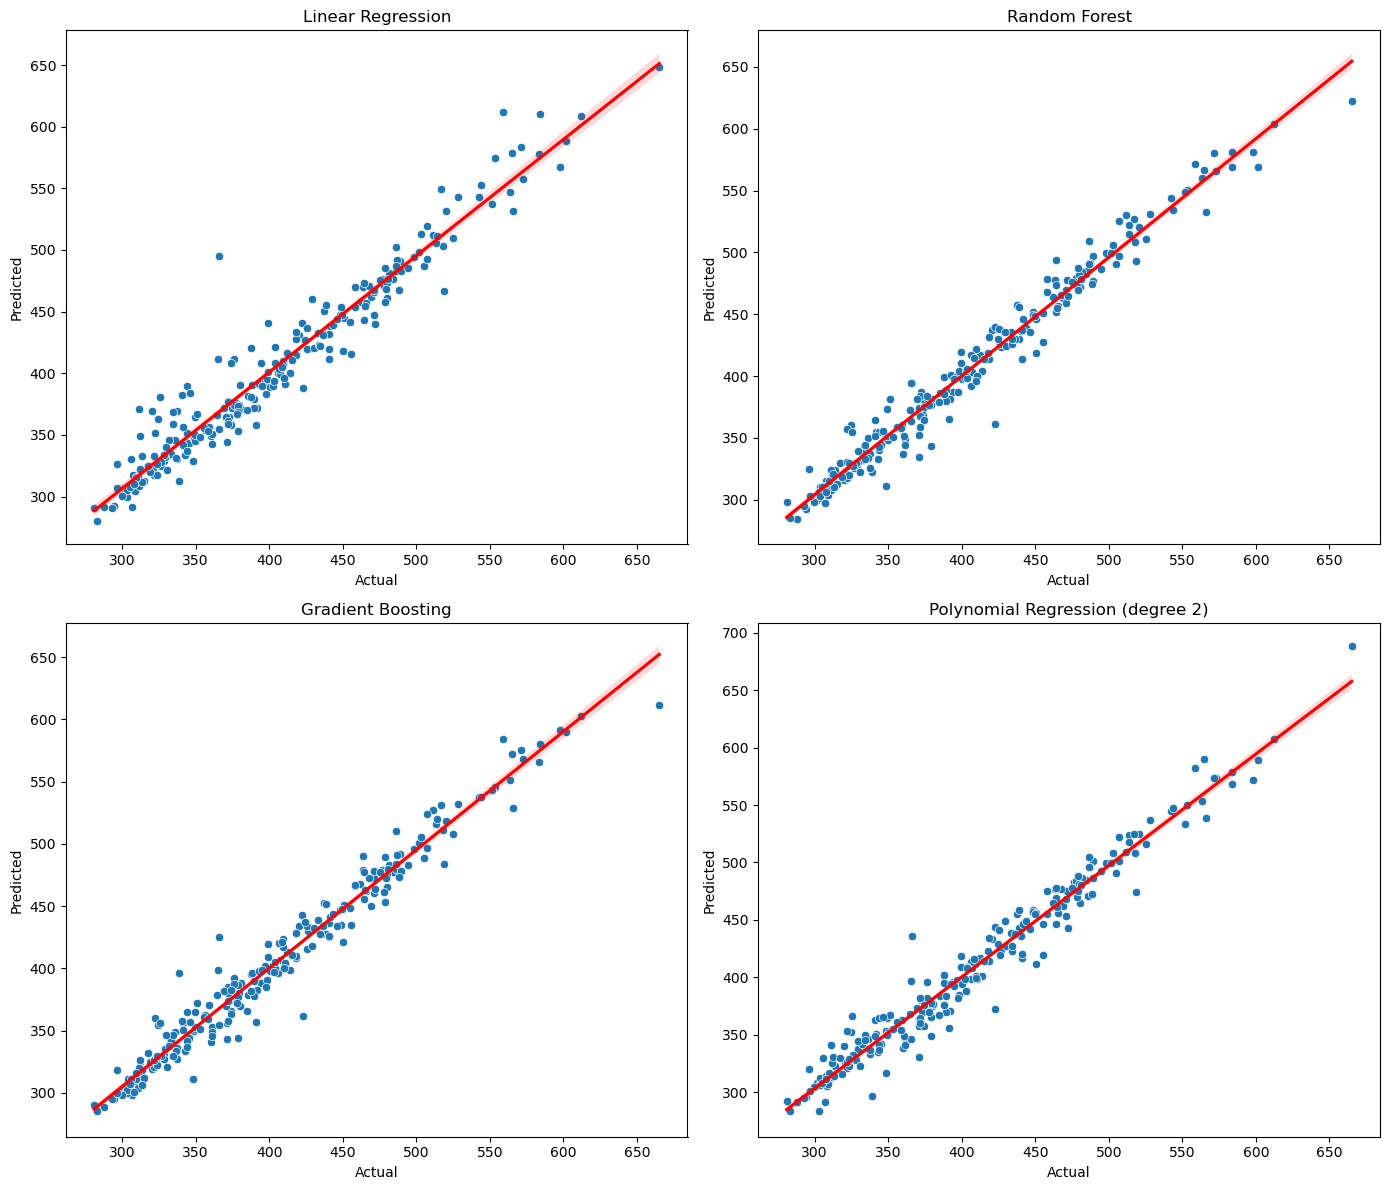

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': comparison_df['Linear Regression'],
    'Random Forest': comparison_df['Random Forest'],
    'Gradient Boosting': comparison_df['Gradient Boosting'],
    f'Polynomial Regression (degree {degree})': comparison_df[f'Polynomial Regression (degree {degree})']
})

# Function to plot actual vs predicted values with regression line
def plot_regression_line(ax, x, y, title):
    sns.scatterplot(x=x, y=y, ax=ax)
    sns.regplot(x=x, y=y, scatter=False, color='red', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

# Plotting actual vs predicted values for each model
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Linear Regression
plot_regression_line(axes[0, 0], comparison_df['Actual'], comparison_df['Linear Regression'], 'Linear Regression')

# Random Forest
plot_regression_line(axes[0, 1], comparison_df['Actual'], comparison_df['Random Forest'], 'Random Forest')

# Gradient Boosting
plot_regression_line(axes[1, 0], comparison_df['Actual'], comparison_df['Gradient Boosting'], 'Gradient Boosting')

# Polynomial Regression
plot_regression_line(axes[1, 1], comparison_df['Actual'], comparison_df[f'Polynomial Regression (degree {degree})'], f'Polynomial Regression (degree {degree})')

plt.tight_layout()
plt.show()


Each blue dot represents a single prediction made by the model.
The closer these dots are to the red line, the more accurate the model is. The red line represents the ideal scenario where the predicted values perfectly match the actual values (y = x).

**Conclusion:**

In this project, we analyzed and predicted solar wind parameters using various machine learning models. Our findings indicate that the Random Forest model is the most effective for predicting these values compared to other models tested.